## High School Data for Analysis

In [6]:
#import our favorite libraries 

import pandas as pd
import numpy as np

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


print('Libraries and geopy imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [7]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Matplotlib and Folium imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


vincent-0.4.4        | 28 KB     | ##################################### | 1

### First, get the coordinates of our starting point, Rochester NY

In [9]:
address = 'Rochester, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Rochester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Rochester are 43.157285, -77.615214.


In [10]:
# The code was removed by Watson Studio for sharing.

### Set a limit of 50 venues, a radius of 1 mile (1609 meters) and a bounding box that covers most of Monroe county as shown.

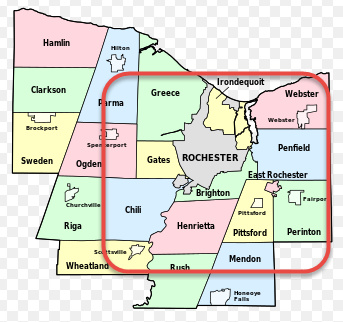

Using the category value from Foursquare, we will search only for high schools within the bounded area

In [11]:
# lets limit our venues to 50 for each starting point, and a mile (1609 meters) from the school
LIMIT = 50
radius = 1609

# set corner points for the bounding box.  SW = Oatka lake near Wheatfield, NE = intersection of Phillips Rd and Lake Road in Webster.  Coordinates from
#    MapQuest's Lat/Long finder tool - https://developer.mapquest.com/documentation/tools/latitude-longitude-finder/
swlat = 42.988576
swlng = -77.809639
nelat = 43.264956
nelng = -77.419796

#search only for high schools
cat = '4bf58dd8d48988d13d941735'

In [12]:
# find all the high schools within our bounding box
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&intent=browse&sw={},{}&ne={},{}&limit={}&query=school&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, swlat,swlng,nelat,nelng, LIMIT,cat)
search_results = requests.get(url).json()
search_results

{'meta': {'code': 200, 'requestId': '5ec9aceddd0f85001b82cddd'},
 'response': {'venues': [{'id': '4c06a5430e0a2d7fc929ec0c',
    'name': 'School Without Walls Commencement Academy',
    'location': {'address': '480 Broadway',
     'lat': 43.147725,
     'lng': -77.60021400000001,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.147725,
       'lng': -77.60021400000001},
      {'label': 'entrance', 'lat': 43.147586, 'lng': -77.600406}],
     'postalCode': '14607',
     'cc': 'US',
     'city': 'Rochester',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['480 Broadway',
      'Rochester, NY 14607',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d13d941735',
      'name': 'High School',
      'pluralName': 'High Schools',
      'shortName': 'High School',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590275825',
    '

### Convert the results of the search into a dataframe, and clean it up.

1. Remove some of the extra concatenated column values
2. Drop some columns we won't be using, like country and cross-street
3. Remove the noise - for some reason, one of the local high schools has entries for rooms within their building - we'll remove those
4. Drop NaN values if any

In [13]:
# convert the results into a dataframe that holds the schools
schools = search_results['response']['venues']

school_frame = json_normalize(schools)
school_frame.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4c06a5430e0a2d7fc929ec0c,480 Broadway,US,Rochester,United States,NaN,"[480 Broadway, Rochester, NY 14607, United Sta...","[{'label': 'display', 'lat': 43.147725, 'lng':...",43.147725,-77.600214,14607,NY,School Without Walls Commencement Academy,v-1590275825,NaN
1,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4b5a5967f964a52021bf28e3,45 Prince St,US,Rochester,United States,NaN,"[45 Prince St, Rochester, NY 14607, United Sta...","[{'label': 'display', 'lat': 43.15859304238724...",43.158593,-77.590421,14607,NY,School of the Arts,v-1590275825,NaN
2,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4be2af16fe299521e074966c,1799 Lehigh Station Rd,US,Henrietta,United States,NaN,"[1799 Lehigh Station Rd, Henrietta, NY 14467, ...","[{'label': 'display', 'lat': 43.05801582195075...",43.058016,-77.606735,14467,NY,Rush Henrietta Senior High School,v-1590275825,475820409
3,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4b747ecdf964a5200ee02de3,55 Sutherland St,US,Pittsford,United States,NaN,"[55 Sutherland St, Pittsford, NY 14534, United...","[{'label': 'display', 'lat': 43.08912647701356...",43.089126,-77.523915,14534,NY,Pittsford-Sutherland High School,v-1590275825,NaN
4,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4c098433340720a145f18493,2707 Spencerport Rd,US,Spencerport,United States,Union St,"[2707 Spencerport Rd (Union St), Spencerport, ...","[{'label': 'display', 'lat': 43.18530896692931...",43.185309,-77.782409,14559,NY,Spencerport High School,v-1590275825,NaN


In [14]:
# remove the noise and just get the location information and name
filtered_columns = ['name'] + [col for col in school_frame.columns if col.startswith('location.')] + ['id']
df = school_frame.loc[:, filtered_columns]

#drop a couple of the things we don't need
df.drop(['location.cc','location.country','location.crossStreet','location.labeledLatLngs'],inplace=True, axis=1)

# for some reason, there are locations that are rooms within a single school - we'll drop those
schools_filtered = df[~df.name.str.contains('Room')]

schools_filtered.dropna(inplace=True)
schools_filtered.reset_index(drop=True, inplace=True)
schools_filtered


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,location.address,location.city,location.formattedAddress,location.lat,location.lng,location.postalCode,location.state,id
0,School Without Walls Commencement Academy,480 Broadway,Rochester,"[480 Broadway, Rochester, NY 14607, United Sta...",43.147725,-77.600214,14607,NY,4c06a5430e0a2d7fc929ec0c
1,School of the Arts,45 Prince St,Rochester,"[45 Prince St, Rochester, NY 14607, United Sta...",43.158593,-77.590421,14607,NY,4b5a5967f964a52021bf28e3
2,Rush Henrietta Senior High School,1799 Lehigh Station Rd,Henrietta,"[1799 Lehigh Station Rd, Henrietta, NY 14467, ...",43.058016,-77.606735,14467,NY,4be2af16fe299521e074966c
3,Pittsford-Sutherland High School,55 Sutherland St,Pittsford,"[55 Sutherland St, Pittsford, NY 14534, United...",43.089126,-77.523915,14534,NY,4b747ecdf964a5200ee02de3
4,Spencerport High School,2707 Spencerport Rd,Spencerport,"[2707 Spencerport Rd (Union St), Spencerport, ...",43.185309,-77.782409,14559,NY,4c098433340720a145f18493
5,Arcadia High School,120 Island Cottage Rd,Rochester,"[120 Island Cottage Rd, Rochester, NY 14612, U...",43.254887,-77.663548,14612,NY,4b5a5ab1f964a5207fbf28e3
6,Thomas Jefferson High School,1 Edgerton Park,Rochester,"[1 Edgerton Park, Rochester, NY 14608, United ...",43.170783,-77.634022,14608,NY,4bf6a8685e800f47cab7e7d4
7,School Of The Holy Childhood,100 Groton Pkwy,Rochester,"[100 Groton Pkwy, Rochester, NY 14623, United ...",43.077886,-77.594378,14623,NY,4beacef961aca5939c2d8400
8,School 22-Lincoln School,27 Zimbrich St,Rochester,"[27 Zimbrich St, Rochester, NY 14621, United S...",43.182838,-77.609455,14621,NY,4c877727e602b1f72dc8c77a
9,Rochester School for the Deaf,1545 Saint Paul St,Rochester,"[1545 Saint Paul St (Driving Park Ave), Roches...",43.184422,-77.625105,14621,NY,4c1965ca95e89521d20657e7


### Now that we have a cleaned up data set, let's create a map to visualize them in the county.

Use Folium to create a map centered on Rochester, then add markers at each school's lat/lng point.

In [15]:
# Let's see where the schools are
# create map of Rochester
map_schools = folium.Map(location=[latitude, longitude], zoom_start=11)


# add markers to the map
for lat, lon, sch in zip(schools_filtered['location.lat'], schools_filtered['location.lng'], schools_filtered['name']):
    label = folium.Popup(str(sch), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="blue",
        fill=True,
        fill_color="blue", 
        fill_opacity=0.7).add_to(map_schools)
       
map_schools

### Next, get the food venues that are within 1 mile of each school.

Use a Foursquare API "explore" call with our predefined LIMIT and radius around each school.  This function was defined in one of the class labs, but we'll tweak it a bit to get the pieces of information we want for this project.

In [16]:
# define the function from class that gets all the nearby venues for each neighborhood
def getNearbyEateries(names, latitudes, longitudes, zipcodes, radius=500):
    
    venues_list=[]
    for name, lat, lng, zipc in zip(names, latitudes, longitudes, zipcodes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=food'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            zipc,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['School', 
                  'School Latitude', 
                  'School Longitude', 
                  'School Zip',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
# get the information for our toronto neighborhoods
school_eats = getNearbyEateries(names=schools_filtered['name'],
                                   latitudes=schools_filtered['location.lat'],
                                   longitudes=schools_filtered['location.lng'],  
                                   zipcodes = schools_filtered['location.postalCode'], radius=1609
                                  )

School Without Walls Commencement Academy
School of the Arts
Rush Henrietta Senior High School
Pittsford-Sutherland High School
Spencerport High School
Arcadia High School
Thomas Jefferson High School
School Of The Holy Childhood
School 22-Lincoln School
Rochester School for the Deaf
Our Lady of Mercy High School
Douglas High School
Gates Chili High School
Southlawn School
West Irondequoit High School
Eastridge High School
Olympia High School
Penfield High School
R. L. Thomas High School
McQuaid Jesuit High School
Monroe High School
Wilson Magnet High School
Rochester Early College International High School
Dr. Charles T. Lunsford School 19
East High School
Brighton High School
Andrews Trahey School
Webster Schroeder High School
Destiny Christian School & Preschool
Norman Howard School
Freddie Thomas High School
Rochester Career Mentoring Charter School
Rochester Academy Charter School
Integrated Arts and Technology High School
Franklin High School
Bishop Kearney High School
East Roche

### Let's take a look at some of the venue information we got back.  Specifically:

1. How many venues overall?
2. What does the dataframe look like?
3. Group to find a count of venues per school
4. Group again to find a count of venues per zip code (some schools share the same zip code, and may share the same venues).  This is just another viewpoint.
5. How many unique venues?  How many unique categories of food venue?

In [19]:
# print the size and first 5 of the returned venues
print(school_eats.shape)
school_eats.head()

(1012, 8)


,School,School Latitude,School Longitude,School Zip,Venue,Venue Latitude,Venue Longitude,Venue Category
0,School Without Walls Commencement Academy,43.147725,-77.600214,14607,The Owl House,43.150247,-77.600983,New American Restaurant
1,School Without Walls Commencement Academy,43.147725,-77.600214,14607,Rocco Restaurant,43.150700,-77.601157,Italian Restaurant
2,School Without Walls Commencement Academy,43.147725,-77.600214,14607,Voula's Greek Sweets,43.147343,-77.595266,Bakery
3,School Without Walls Commencement Academy,43.147725,-77.600214,14607,Napa Wood Fired Pizzeria,43.145838,-77.602231,Pizza Place
4,School Without Walls Commencement Academy,43.147725,-77.600214,14607,McCann's Local Meats,43.142823,-77.600183,Deli / Bodega


In [20]:
#how many venues in each neighborhood?
seg = school_eats.groupby('School').count()
seg

,School Latitude,School Longitude,School Zip,Venue,Venue Latitude,Venue Longitude,Venue Category
School,,,,,,,
Andrews Trahey School,50,50,50,50,50,50,50
Arcadia High School,12,12,12,12,12,12,12
Bishop Kearney High School,44,44,44,44,44,44,44
Brighton High School,26,26,26,26,26,26,26
Charles Finney High School,28,28,28,28,28,28,28
Dake Jr. High School,18,18,18,18,18,18,18
Destiny Christian School & Preschool,12,12,12,12,12,12,12
Douglas High School,26,26,26,26,26,26,26
Dr. Charles T. Lunsford School 19,18,18,18,18,18,18,18


In [21]:
#unique categories  and venues for all the venues
print('There are {} unique categories.'.format(len(school_eats['Venue Category'].unique())))
print('There are {} unique Venues.'.format(len(school_eats['Venue'].unique())))

There are 57 unique categories.
There are 479 unique Venues.


### Using the same data, display the information as bar charts, sorted for numbers of venues.

1. Where are the most venues located?
2. Is there a pattern?
3. What about the least number of venues?

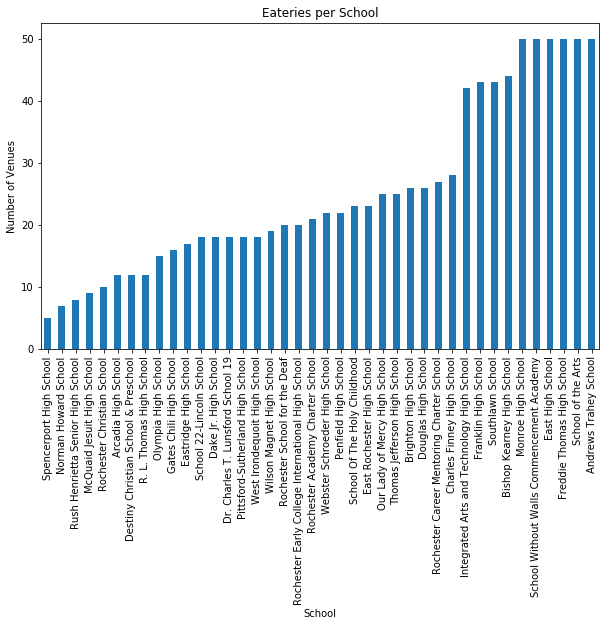

In [24]:
# Plot the number of food venues by school
from matplotlib import pyplot as plt

seg.sort_values(['Venue'], ascending=True, axis=0, inplace=True)

seg["Venue"].plot(kind="bar",figsize=(10, 6))
plt.title("Eateries per School")
plt.ylabel("Number of Venues")
plt.xlabel("School")
plt.show()


In [23]:
#how many venues in each zip code?
zeg = school_eats.groupby('School Zip').count()
zeg

,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
School Zip,,,,,,,
14445,23,23,23,23,23,23,23
14467,8,8,8,8,8,8,8
14526,50,50,50,50,50,50,50
14534,18,18,18,18,18,18,18
14559,5,5,5,5,5,5,5
14580,34,34,34,34,34,34,34
14605,77,77,77,77,77,77,77
14607,150,150,150,150,150,150,150
14608,43,43,43,43,43,43,43


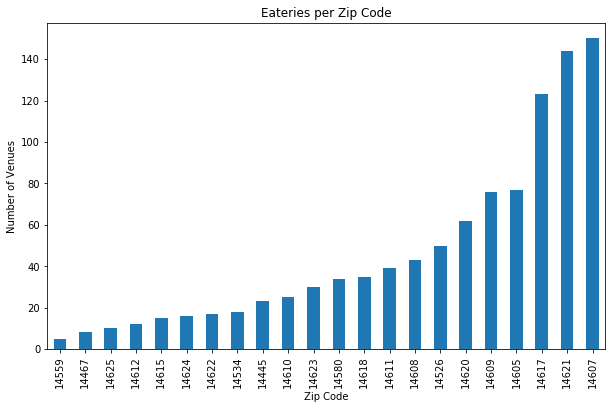

In [25]:
# Plot the number of food venues by school

zeg.sort_values(['Venue'], ascending=True, axis=0, inplace=True)

zeg["Venue"].plot(kind="bar", figsize=(10,6))
plt.title("Eateries per Zip Code")
plt.ylabel("Number of Venues")
plt.xlabel("Zip Code")
plt.show()

### Read in poverty percentage data by zip code.  We may use this later.

In [26]:
# The code was removed by Watson Studio for sharing.

,zipCode,povPct
0,14607,32.6
1,14467,13.7
2,14534,3.2
3,14559,9.4
4,14612,32.6


### Let's do some analysis on the venues near each school

1. Categorize the venues, then group them, finding the mean percentage for each type of venue in the mile radius around the school.  The result of this exercise is one row per school, with percentages for each venue type.


In [27]:
# one hot encoding
schools_onehot = pd.get_dummies(school_eats[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
schools_onehot['School'] = school_eats['School'] 

# move neighborhood column to the first column
fixed_columns = [schools_onehot.columns[-1]] + list(schools_onehot.columns[:-1])
schools_onehot = schools_onehot[fixed_columns]

schools_onehot.head()

,School,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,...,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,School Without Walls Commencement Academy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,School Without Walls Commencement Academy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,School Without Walls Commencement Academy,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,School Without Walls Commencement Academy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,School Without Walls Commencement Academy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# shape of the resulting onehot dataframe
schools_onehot.shape

(1012, 58)

In [29]:
# Group rows by neighborhood and take the mean of the frequency of each category's occurrence
se_grouped = schools_onehot.groupby('School').mean().reset_index()
se_grouped

,School,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,...,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Andrews Trahey School,0.040000,0.060000,0.020000,0.040000,0.080000,0.00,0.00,0.040000,0.020000,...,0.000000,0.000000,0.040000,0.020000,0.02,0.000000,0.000000,0.00,0.020000,0.000000
1,Arcadia High School,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000
2,Bishop Kearney High School,0.022727,0.022727,0.000000,0.000000,0.090909,0.00,0.00,0.022727,0.022727,...,0.000000,0.022727,0.000000,0.000000,0.00,0.000000,0.022727,0.00,0.022727,0.000000
3,Brighton High School,0.000000,0.000000,0.000000,0.038462,0.153846,0.00,0.00,0.000000,0.076923,...,0.000000,0.000000,0.038462,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000
4,Charles Finney High School,0.107143,0.000000,0.000000,0.035714,0.000000,0.00,0.00,0.000000,0.071429,...,0.000000,0.000000,0.000000,0.035714,0.00,0.000000,0.035714,0.00,0.000000,0.000000
5,Dake Jr. High School,0.111111,0.000000,0.000000,0.055556,0.000000,0.00,0.00,0.000000,0.055556,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000
6,Destiny Christian School & Preschool,0.083333,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.083333,...,0.000000,0.000000,0.083333,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000
7,Douglas High School,0.038462,0.000000,0.000000,0.000000,0.038462,0.00,0.00,0.000000,0.038462,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.038462,0.00,0.000000,0.000000
8,Dr. Charles T. Lunsford School 19,0.055556,0.000000,0.055556,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000
9,East High School,0.040000,0.040000,0.020000,0.020000,0.080000,0.02,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.020000,0.00,0.020000,0.000000


In [30]:
se_grouped.shape

(40, 58)

### We've lost a school (40, instead of 41).  Turns out, one school has no food venues within a mile...interesting.

The school in question is a large campus school in an affluent area, surrounded mostly by large residential suburbs.  Students here are very likely to have their own cars, making it easier for them to travel more than a mile on their excursions.  We'll consider this one an outlier.

In [31]:
school_eats[school_eats['School'] == 'Pittsford Mendon High School']

,School,School Latitude,School Longitude,School Zip,Venue,Venue Latitude,Venue Longitude,Venue Category


### Print the top five venues for each school, then put that information into a dataframe.

In [32]:
# print the top 5 venues in each neighborhood

num_top_venues = 5

for hood in se_grouped['School']:
    print("----"+hood+"----")
    temp = se_grouped[se_grouped['School'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Andrews Trahey School----
              venue  freq
0            Bakery  0.08
1       Pizza Place  0.08
2  Asian Restaurant  0.06
3             Diner  0.06
4    Sandwich Place  0.04


----Arcadia High School----
                  venue  freq
0           Pizza Place  0.42
1        Sandwich Place  0.08
2                 Diner  0.08
3    Chinese Restaurant  0.08
4  Fast Food Restaurant  0.08


----Bishop Kearney High School----
                  venue  freq
0                Bakery  0.09
1           Pizza Place  0.09
2  Fast Food Restaurant  0.09
3                 Diner  0.09
4        Sandwich Place  0.07


----Brighton High School----
                venue  freq
0              Bakery  0.15
1         Pizza Place  0.12
2  Chinese Restaurant  0.08
3        Burger Joint  0.08
4                Food  0.08


----Charles Finney High School----
                 venue  freq
0          Pizza Place  0.21
1  American Restaurant  0.11
2   Italian Restaurant  0.11
3                 Café  0.07
4   Me

# Put the top venue information into a dataframe

In [33]:
# define the function from class that sorts the venue list

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
# create the new dataframe iwth the top ten venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['School']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
se_venues_sorted = pd.DataFrame(columns=columns)
se_venues_sorted['School'] = se_grouped['School']

for ind in np.arange(se_grouped.shape[0]):
    se_venues_sorted.iloc[ind, 1:] = return_most_common_venues(se_grouped.iloc[ind, :], num_top_venues)

se_venues_sorted.head()

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andrews Trahey School,Bakery,Pizza Place,Asian Restaurant,Diner,American Restaurant,Café,Mediterranean Restaurant,Mexican Restaurant,Noodle House,Sandwich Place
1,Arcadia High School,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Donut Shop,Burger Joint,Diner,Sandwich Place,Café,Food Court,Food
2,Bishop Kearney High School,Fast Food Restaurant,Bakery,Diner,Pizza Place,Sandwich Place,Café,Fried Chicken Joint,Donut Shop,Deli / Bodega,Italian Restaurant
3,Brighton High School,Bakery,Pizza Place,Chinese Restaurant,Food,Burger Joint,Sandwich Place,Salad Place,Deli / Bodega,Mexican Restaurant,Middle Eastern Restaurant
4,Charles Finney High School,Pizza Place,American Restaurant,Italian Restaurant,Burger Joint,Chinese Restaurant,Mexican Restaurant,Café,Thai Restaurant,French Restaurant,Sandwich Place


# Cluster Schools

Now let's group the schools into clusters of similar environments.  We'll use K-Means clustering to partition the dataset.

### Step 1: Find the right K

    Run the Kmeans algorithm using the grouped data and 1 through 20 as values for K to see which is the best option for K
    Plot the resulting squared error values to find the elbow.

<function matplotlib.pyplot.show(*args, **kw)>

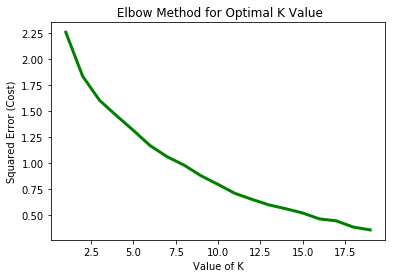

In [35]:

# set number of clusters and set up an array for cost calculation for each K
kclusters = 20
cost = []

se_grouped_clustering = se_grouped.drop('School', 1)

for i in range(1,kclusters):
    # run k-means clustering
    kmeans = KMeans(n_clusters=i, random_state=0).fit(se_grouped_clustering)
    
    cost.append(kmeans.inertia_)

#plot the results to find the elbow (best K)
plt.plot(range(1,kclusters), cost, color = 'green', linewidth = '3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.title(" Elbow Method for Optimal K Value")
plt.show

### Hmmm...no elbow, or at least, not a clearly defined one.   Let's try another approach - Silhouette score

In this case, we run the same K-means clustering as we did before (this time we'll use 10 clusters, because 20 was a bit too many), but this time we'll calculate the silhouette score for each K.  The highest score indicates the best K value.

<function matplotlib.pyplot.show(*args, **kw)>

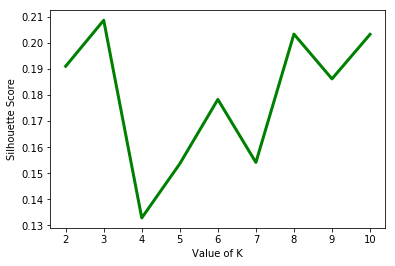

In [54]:
# get the silhouette score

from sklearn.metrics import silhouette_score

kclusters = 10
sil = []

se_grouped_clustering = se_grouped.drop('School', 1)

for i in range(2,kclusters+1):
    # run k-means clustering
    kmeans = KMeans(n_clusters=i).fit(se_grouped_clustering)
    
    labels = kmeans.labels_
    
    sil.append(silhouette_score(se_grouped_clustering, labels, metric='euclidean'))

#plot the results to find the elbow (best K)
plt.plot(range(2,kclusters+1), sil, color = 'green', linewidth = '3')
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show

### The Elbow test was inconclusive, even with a large value of K, but the Silhouette Score shows a clear peak at 3, therefore 3 is our optimal K value

### Run the K-Means calculation again, this time with our discovered optimal K value of 3.  Add the cluster lables to the "Top 10 venues" data set, and from the filtered school data set,  pull out just the columns we're interested in - lat, lng and zipcode

In [55]:
# now that we've found the best value for K, run the data using that value
bestK = 3
kmeans = KMeans(n_clusters=bestK, random_state=0).fit(se_grouped_clustering)
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 0, 0, 1, 0, 2, 1], dtype=int32)

In [57]:
# add clustering labels
se_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#pull just the lat/long columns from the filtered dataframe
se_final = schools_filtered [['name','location.lat','location.lng', 'location.postalCode']]
se_final.rename(columns = {'name':'School', 'location.postalCode':'zipCode'}, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [58]:
se_final.head()

,School,location.lat,location.lng,zipCode
0,School Without Walls Commencement Academy,43.147725,-77.600214,14607
1,School of the Arts,43.158593,-77.590421,14607
2,Rush Henrietta Senior High School,43.058016,-77.606735,14467
3,Pittsford-Sutherland High School,43.089126,-77.523915,14534
4,Spencerport High School,43.185309,-77.782409,14559


### Merge the lat/lng and zip code information with the cluster-labeled data to make one complete dataframe.

We'll also remove any schools that weren't assigned to a cluster (if there are any).  

In [59]:
# merge the grouped venues with the school lat/lng data to add lat/lng for each school to the final set
seF = se_venues_sorted.merge(se_final, how='left', on='School')


In [60]:
# merge again with the poverty by zip code data to add another piece of information
seF = seF.merge(df_data_1, how='left', on='zipCode')

seF.head()

,Cluster Labels,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,location.lat,location.lng,zipCode,povPct
0,1,Andrews Trahey School,Bakery,Pizza Place,Asian Restaurant,Diner,American Restaurant,Café,Mediterranean Restaurant,Mexican Restaurant,Noodle House,Sandwich Place,43.136334,-77.579076,14620,32.6
1,0,Arcadia High School,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Donut Shop,Burger Joint,Diner,Sandwich Place,Café,Food Court,Food,43.254887,-77.663548,14612,32.6
2,1,Bishop Kearney High School,Fast Food Restaurant,Bakery,Diner,Pizza Place,Sandwich Place,Café,Fried Chicken Joint,Donut Shop,Deli / Bodega,Italian Restaurant,43.201800,-77.578971,14617,8.0
3,1,Brighton High School,Bakery,Pizza Place,Chinese Restaurant,Food,Burger Joint,Sandwich Place,Salad Place,Deli / Bodega,Mexican Restaurant,Middle Eastern Restaurant,43.123370,-77.566187,14618,10.0
4,0,Charles Finney High School,Pizza Place,American Restaurant,Italian Restaurant,Burger Joint,Chinese Restaurant,Mexican Restaurant,Café,Thai Restaurant,French Restaurant,Sandwich Place,43.132969,-77.475326,14526,3.8


In [61]:
#drop rows that weren't assigned to a cluster (NaN)
seF = seF.dropna()
seF = seF.reset_index(drop=True)


In [62]:
seF.shape

(40, 16)

## Everything is looking good - it's time to add the clusters to our high school map


In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(bestK)
ys = [i + x + (i*x)**2 for i in range(bestK)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seF['location.lat'], seF['location.lng'], seF['School'], seF['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        line_color = '#3186cc',
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [48]:
bestK

4

# Examine Clusters

So what do all the colors mean?  Let's look at the schools and venues that make up each cluster.  At the end we'll also plot the venue counts to see if they match our hypothesis for each cluster.

__Cluster 1__  (Red) Pizza Party

    In this group of 10 schools, it is very clear that the most common venue by far is the pizza place.  In 2nd thru 10th place, there is less consistency, but pizza dominates.  We'll call this cluster the pizza party!

In [64]:
seF.loc[seF['Cluster Labels'] == 0, seF.columns[[1] + list(range(2, seF.shape[1]))]]

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,location.lat,location.lng,zipCode,povPct
1,Arcadia High School,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Donut Shop,Burger Joint,Diner,Sandwich Place,Café,Food Court,Food,43.254887,-77.663548,14612,32.6
4,Charles Finney High School,Pizza Place,American Restaurant,Italian Restaurant,Burger Joint,Chinese Restaurant,Mexican Restaurant,Café,Thai Restaurant,French Restaurant,Sandwich Place,43.132969,-77.475326,14526,3.8
5,Dake Jr. High School,Chinese Restaurant,Pizza Place,Sandwich Place,American Restaurant,Bagel Shop,Burger Joint,Italian Restaurant,Food,Donut Shop,Fish & Chips Shop,43.218252,-77.597589,14617,8.0
7,Douglas High School,Pizza Place,Food,Donut Shop,Diner,Fast Food Restaurant,German Restaurant,Greek Restaurant,Deli / Bodega,Mediterranean Restaurant,Mexican Restaurant,43.177977,-77.563832,14609,8.0
19,Olympia High School,Pizza Place,Burger Joint,American Restaurant,Diner,Chinese Restaurant,Steakhouse,Donut Shop,Creperie,Food Court,Food,43.221207,-77.673377,14615,9.4
21,Penfield High School,Pizza Place,Italian Restaurant,American Restaurant,Mexican Restaurant,Chinese Restaurant,Café,Sushi Restaurant,Burger Joint,Donut Shop,Diner,43.136750,-77.470700,14526,3.8
24,Rochester Academy Charter School,Pizza Place,Sandwich Place,Mexican Restaurant,Café,Food,Middle Eastern Restaurant,Chinese Restaurant,Deli / Bodega,Cafeteria,Mediterranean Restaurant,43.182394,-77.586918,14621,8.0
29,Rush Henrietta Senior High School,Pizza Place,Chinese Restaurant,Donut Shop,Sandwich Place,Café,Food Court,Food,Fish & Chips Shop,Fast Food Restaurant,Ethiopian Restaurant,43.058016,-77.606735,14467,13.7
35,Spencerport High School,Pizza Place,Sandwich Place,Chinese Restaurant,American Restaurant,Bagel Shop,Creperie,Food Court,Food,Fish & Chips Shop,Fast Food Restaurant,43.185309,-77.782409,14559,9.4
38,West Irondequoit High School,Chinese Restaurant,Pizza Place,Sandwich Place,American Restaurant,Bagel Shop,Burger Joint,Italian Restaurant,Food,Donut Shop,Fish & Chips Shop,43.216161,-77.596727,14617,8.0


__Cluster 2__   (Purple) Fast Food and Burgers, a Foodie Heaven

    While pizza still shows up in this next group (26 schools this time), it does not dominate like it did in cluster 0. However, looking at just the first 3 places, there are a lot of Pizza, Fast Food, Bakery and Burger restaurants.  The rest of the options are very broad, making this cluster a food lover's heaven, since they can get almost anything they'd like within a mile.

In [65]:
seF.loc[seF['Cluster Labels'] == 1, seF.columns[[1] + list(range(2, seF.shape[1]))]]

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,location.lat,location.lng,zipCode,povPct
0,Andrews Trahey School,Bakery,Pizza Place,Asian Restaurant,Diner,American Restaurant,Café,Mediterranean Restaurant,Mexican Restaurant,Noodle House,Sandwich Place,43.136334,-77.579076,14620,32.6
2,Bishop Kearney High School,Fast Food Restaurant,Bakery,Diner,Pizza Place,Sandwich Place,Café,Fried Chicken Joint,Donut Shop,Deli / Bodega,Italian Restaurant,43.201800,-77.578971,14617,8.0
3,Brighton High School,Bakery,Pizza Place,Chinese Restaurant,Food,Burger Joint,Sandwich Place,Salad Place,Deli / Bodega,Mexican Restaurant,Middle Eastern Restaurant,43.123370,-77.566187,14618,10.0
6,Destiny Christian School & Preschool,Cafeteria,American Restaurant,Deli / Bodega,Pizza Place,Café,Donut Shop,Burger Joint,Dim Sum Restaurant,Steakhouse,Indian Restaurant,43.079776,-77.586481,14620,32.6
9,East High School,Pizza Place,Italian Restaurant,Bakery,Diner,Restaurant,American Restaurant,Asian Restaurant,Café,Chinese Restaurant,Mediterranean Restaurant,43.158932,-77.564307,14609,8.0
10,East Rochester High School,Pizza Place,Italian Restaurant,Fast Food Restaurant,Food,Gastropub,BBQ Joint,Bakery,Burrito Place,Café,Chinese Restaurant,43.107617,-77.492975,14445,12.4
11,Eastridge High School,Diner,Thai Restaurant,Pizza Place,Food,Spanish Restaurant,Deli / Bodega,Italian Restaurant,Sandwich Place,Chinese Restaurant,Bakery,43.205406,-77.553431,14622,10.0
12,Franklin High School,Fast Food Restaurant,Burger Joint,Food,Donut Shop,Bakery,Diner,Café,Fried Chicken Joint,Chinese Restaurant,Mediterranean Restaurant,43.188383,-77.597455,14621,8.0
13,Freddie Thomas High School,Food,New American Restaurant,American Restaurant,Food Truck,Café,Donut Shop,Pizza Place,Restaurant,Sandwich Place,Fast Food Restaurant,43.168294,-77.594042,14605,32.6
14,Gates Chili High School,Burger Joint,Fast Food Restaurant,Diner,Restaurant,Food,BBQ Joint,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Donut Shop,43.154730,-77.707758,14624,7.4


__Cluster 3__  (Aqua) Corner Store, maybe a desert...
    
    This group is much smaller, with only 4 schools.  Note the nigh poverty percentage for 3 of the 4 zip codes in this set. The Deli/Bodega shows up first for the schools located in the city proper, and the other high school, McQuaid, almost seems not to fit here.  But it does have Cafe and Bodega in it's top 10, making it more similar to the other three than those in the other groups.  This makes sense, based on McQuaid's physical location - it is another large campus private school in a residential area, with a much lower poverty percentage than the other schools in the cluster.  However, nearby there are two retail areas with a variety of different eateries, on the edge of the city.

In [66]:
seF.loc[seF['Cluster Labels'] == 2, seF.columns[[1] + list(range(2, seF.shape[1]))]]

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,location.lat,location.lng,zipCode,povPct
8,Dr. Charles T. Lunsford School 19,Deli / Bodega,Pizza Place,Diner,Chinese Restaurant,Caribbean Restaurant,Café,Sandwich Place,American Restaurant,BBQ Joint,Dim Sum Restaurant,43.141600,-77.643171,14608,32.6
16,McQuaid Jesuit High School,Café,Noodle House,Food Truck,Restaurant,Indian Restaurant,Steakhouse,Chinese Restaurant,Donut Shop,Dim Sum Restaurant,Deli / Bodega,43.123712,-77.592530,14618,10.0
27,Rochester Early College International High School,Café,Deli / Bodega,Diner,Chinese Restaurant,Caribbean Restaurant,Pizza Place,Sandwich Place,Food,Hot Dog Joint,Restaurant,43.145602,-77.634848,14611,32.6
39,Wilson Magnet High School,Deli / Bodega,Chinese Restaurant,Café,Pizza Place,Caribbean Restaurant,Sandwich Place,Diner,Food Truck,BBQ Joint,Dim Sum Restaurant,43.140145,-77.637458,14611,32.6


### Visualizing Cluster Composition 

With a little manipulation to get counts of how many venues are in each category for each school, and then taking the top 10 of those, we arrive at the same data as the above clusters show, but this time in numerical form.

First, we summarize by venue for each school.  Then we group the schools into their assigned clusters, and summarize again.  The end result is a dataframe with 3 rows, one for each cluster, and a count of venues by type.

In [67]:
#count the number of each type of restaurant for each school
vencount = schools_onehot.groupby('School').sum().reset_index()

In [68]:
#add in the cluster labels
vencount.insert(0, 'Cluster Labels', kmeans.labels_)
vencount.head()

,Cluster Labels,School,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,...,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,1,Andrews Trahey School,2,3,1,2,4,0,0,2,...,0,0,2,1,1,0,0,0,1,0
1,0,Arcadia High School,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Bishop Kearney High School,1,1,0,0,4,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,1,Brighton High School,0,0,0,1,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,Charles Finney High School,3,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [69]:
#summarize again by cluster
cluscount = vencount.groupby('Cluster Labels').sum().reset_index()
cluscount = cluscount.set_index('Cluster Labels')

In [70]:

cluscount.head()

,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,...,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,14,0,0,3,2,0,0,0,10,0,...,0,0,1,2,0,0,3,0,0,0
1,36,18,7,9,43,1,1,11,33,4,...,7,5,11,6,1,2,5,6,9,1
2,2,0,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Look at the top 10 venues for each cluster as bar charts, to visualize the pattern of the venues for that cluster.

Also interesting - what are the top ten?  Not just the most frequent, but the overall type of venue in the area. Are they the types of food places that would appeal to high school students?

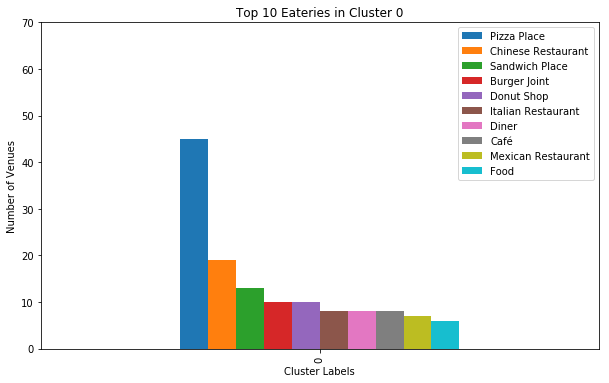

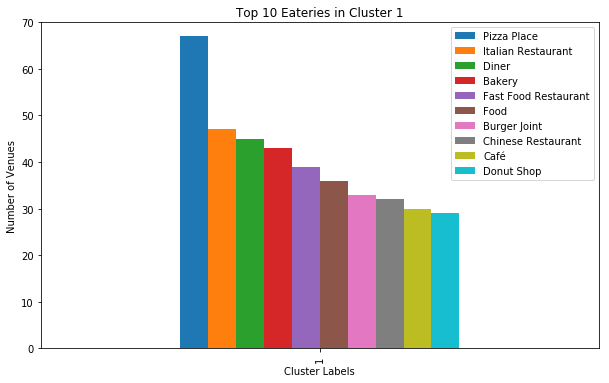

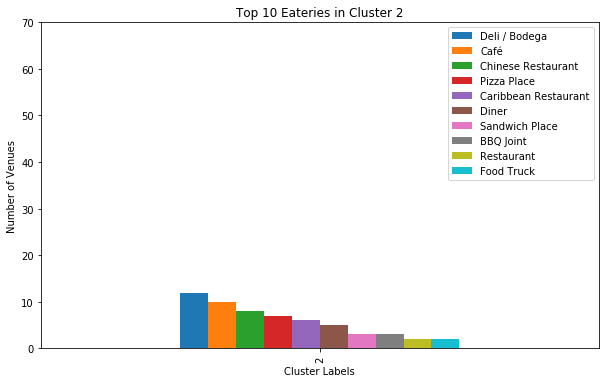

In [71]:
# graph counts by cluster
num_top_venues = 10
#for ind in np.arange(cluscount.shape[0]):
#    reslist = return_most_common_venues(cluscount.iloc[ind, :], num_top_venues).tolist()
#    print(ind, reslist)
#   print(reslist.dtype)

#col = cluscount.columns
#cluscount.plot.bar()

#cluscount["Cluster Labels"]
for ind in np.arange(cluscount.shape[0]):
   
    # get the top ten venues for this cluster, and move them into a new dataframe for plotting
    yval = return_most_common_venues(cluscount.iloc[ind, :], num_top_venues).tolist()
    tdf = cluscount[yval]
    tdfp = tdf[tdf.index==ind]
    
    ax1 = tdfp.plot(kind="bar",figsize=(10,6))

    #set the axis limits so all the cluster plots have the same range
    ax1.set_ylim(0,70)

    plt.title("Top 10 Eateries in Cluster " + str(ind))
    plt.ylabel("Number of Venues")
    plt.show()

### Now we have enough information to do our analysis.  That will also raise other questions that we could consider in future iterations.

Thanks for viewing!